In [ ]:
### 라이브러리 로드 
import pandas as pd

In [ ]:
## 코로나 데이터를 로드 
## 상위 폴더로 이동 -> csv 폴더로 이동 -> corona.csv 파일 지정
corona = pd.read_csv("../csv/corona.csv")
corona.head()

In [ ]:
## 컬럼을 삭제
## drop() 함수를 이용하여 컬럼을 삭제
## axis라는 매개변수의 값을 기준으로 행, 열을 지정
## inplace 매개변수의 값을 기준으로 기준이 되는 데이터를 변경을 할지 지정

corona.drop(["Unnamed: 0"], axis=1)

corona.drop(['Unnamed: 0'], axis=1, inplace=True)
# corona = corona.drop(['Unnamed: 0'], axis=1)

In [ ]:
corona.head()

In [ ]:
## 컬럼의 이름을 변경
## 컬럼의 목록 출력 방법
corona.columns = ["등록일시", "총 사망자", "총 확진자", "게시글 번호",
                  "기준일", "기준시간", "수정일시", "누적 의심자", 
                  "누적 확진률"]

In [ ]:
corona.head(1)

In [ ]:
### 게시글 번호, 기준일, 기준시간 컬럼을 삭제
corona.drop(["게시글 번호", "기준일", "기준시간"], axis=1, inplace=True)

In [ ]:
def test_drop(columns, axis=0):
    print(columns)
    for i in columns:
        print(i)

In [ ]:
test_drop(["게시글 번호"], ["기준일"], 1)

In [ ]:
### 데이터프레임의 정렬을 변경
### 등록일시를 기준으로 오름차순 정렬
### sort_values([기준이 되는 컬럼명])
### ascending 매개변수의 값이 True(기본값)면 오름차순, False면 내림차순 정렬

corona.sort_values(['등록일시'], inplace=True)

In [ ]:
## 인덱스의 값을 초기화
## reset_index()
#corona.reset_index().drop(['index'], axis=1)
corona.reset_index(drop=True, inplace=True)
#corona = corona.reset_index(drop=True)

In [ ]:
## 결측치 조회
corona.info()

In [ ]:
corona.isna().sum()

In [ ]:
corona.head(10)

In [ ]:
## 데이터 간의 차이를 출력하는 함수
## diff(n) : n은 인덱스의 이동 횟수 (n은 기본값 1)
corona['총 확진자'].diff()


In [ ]:
corona['일일 확진자'] = corona['총 확진자'].diff()

In [ ]:
corona.head()

In [ ]:
## 일일 사망자 컬럼을 생성
corona['일일 사망자'] = corona['총 사망자'].diff()

In [ ]:
corona.head()

In [ ]:
corona[["등록일시", "총 사망자", "일일 사망자", "총 확진자", "일일 확진자", 
        "수정일시", "누적 의심자", "누적 확진률"]]

In [ ]:
## 인덱스를 이동 
## shift(n) n만큼 인덱스 이동

corona['총 사망자'].shift(1)

In [ ]:
corona['총 사망자']

In [ ]:
corona['총 사망자'] - corona['총 사망자'].shift(1)

In [ ]:
## 결측치를 다른 값으로 대체
## fillna(n) : 결측치를 n으로 채워준다.

## 일일 확진자, 일일 사망자에 결측치를 0으로 대체
corona[['일일 확진자', '일일 사망자']] = \
    corona[['일일 확진자', '일일 사망자']].fillna(0)

In [ ]:
corona.head()

In [ ]:
## fillna() method 매개변수 -> ffill, bfill

In [ ]:
corona.iloc[690:693]

In [ ]:
corona['누적 의심자'] = corona['누적 의심자'].fillna(method='ffill')

In [ ]:
corona.iloc[690:695]

In [ ]:
### 데이터 시각화 라이브러리 matplotlib
## 라이브러리 설치
!pip install matplotlib

In [50]:
## 라이브러리 로드 
import matplotlib.pyplot as plt

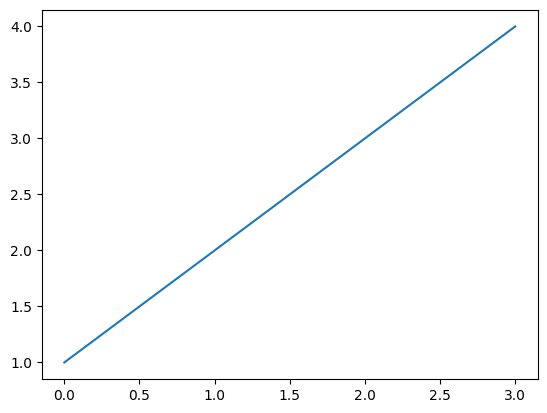

In [51]:
## 라인 그래프 출력

## 도화지에 그려질 x, y축의 수치를 지정
plt.plot([1,2,3,4])

## 그래프 출력
plt.show()

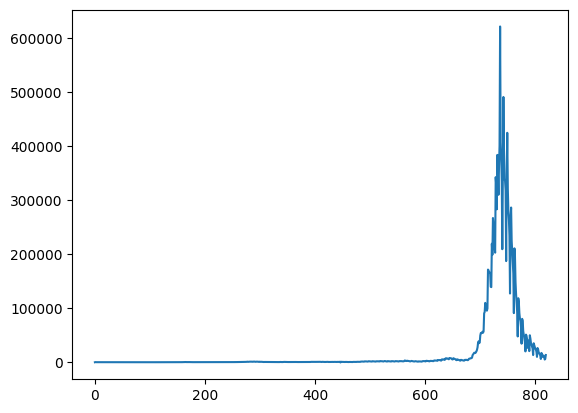

In [52]:
plt.plot(corona['일일 확진자'])
plt.show()

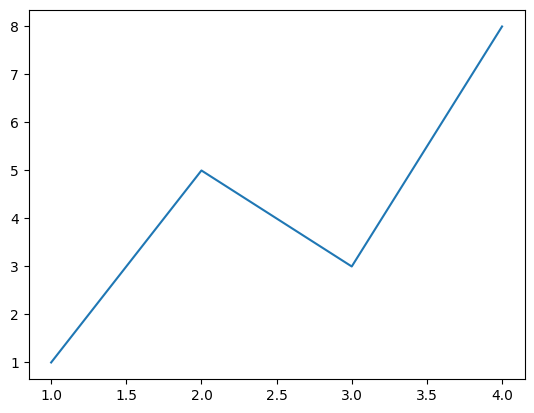

In [54]:
plt.plot([1,2,3,4], [1,5,3,8])
plt.show()

In [59]:
import platform

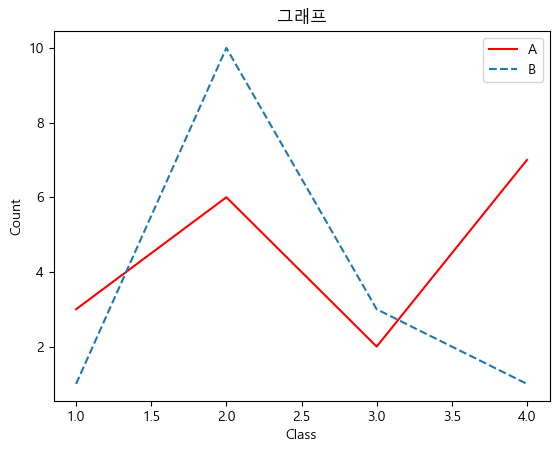

In [61]:
x = [1,2,3,4]
y1 = [3, 6, 2, 7]
y2 = [1, 10, 3, 1]

## 한글이 깨지는 현상을 막기 위해 폰트 변경
if platform.system() == 'Darwin':   ## Mac 인 경우
    plt.rc('font', family='AppleGotic')
else : 
    plt.rc("font", family='Malgun Gothic')

## 선의 색 
plt.plot(x, y1, 'r')
## 선의 종류
plt.plot(x, y2, "--")
## x축의 이름
plt.xlabel("Class")
## y축의 이름
plt.ylabel("Count")
## title
plt.title("그래프")
## 범례 추가
plt.legend(["A", "B"])
plt.show()

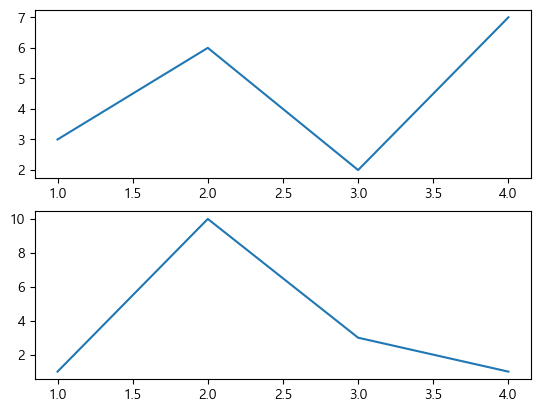

In [62]:
## subplot(행의 수, 열의 수, 위치)

## 그래프 2개 그린다는 가정

## subplot을 이용해서 위치를 지정
plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.subplot(2, 1, 2)
plt.plot(x, y2)

plt.show()

In [63]:
## 바형 그래프 
x = [1,2,3,4]
y = [80, 60, 90, 70]

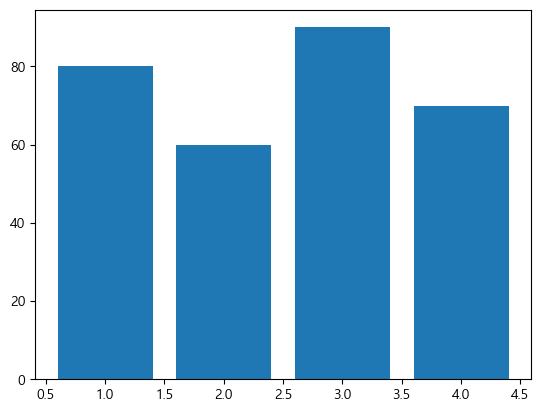

In [64]:
plt.bar(x, y)
plt.show()

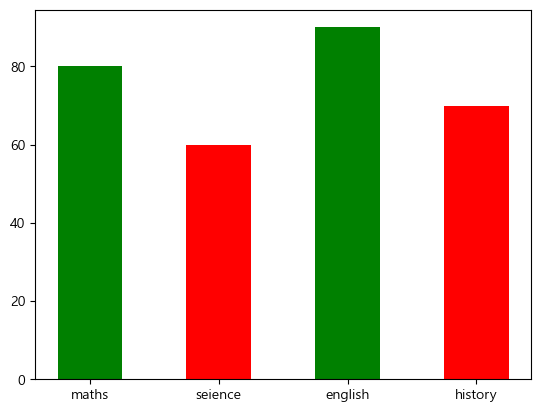

In [66]:
## 막대의 너비와 색상 변경
plt.bar(x, y, color=['g', 'r'], width=0.5)

## x축의 이름을 변경

plt.xticks(x, ['maths', 'seience', 'english', 'history'])

plt.show()

In [67]:
## 산점도 그래프 
import numpy as np

In [70]:
x = np.random.rand(50)
y = np.random.rand(50)


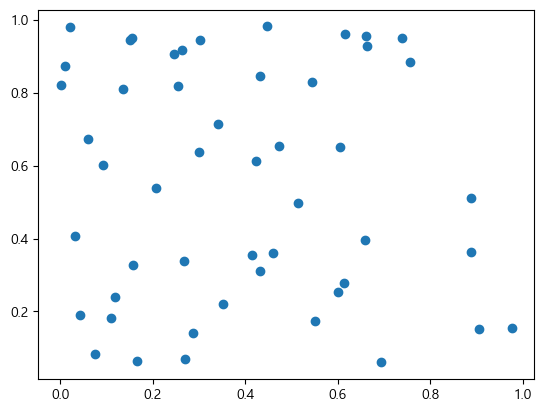

In [71]:
plt.scatter(x, y)
plt.show()

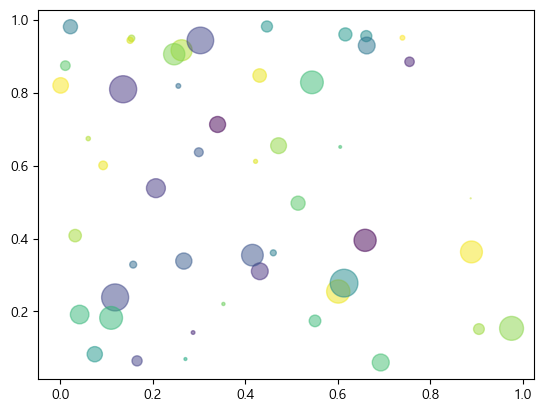

In [76]:
## 영역, 색 , 투명도 변경
color = np.random.rand(50)
area = (20 * np.random.rand(50))**2

plt.scatter(x, y, s = area, c = color, alpha = 0.5)
plt.show()

